In [805]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from scipy import stats
import sklearn.metrics as metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn

In [806]:
df=pd.read_csv("mtcars.csv")
df.head(10)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [807]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


<AxesSubplot:>

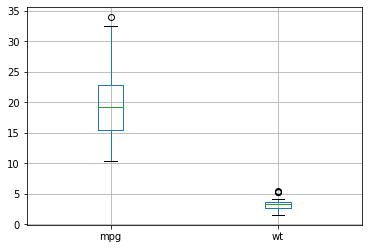

In [808]:
df_1=df[["mpg","wt"]]
df_1.boxplot()

c:\users\rahpa\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


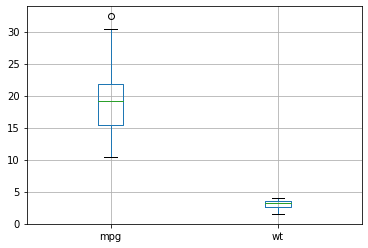

In [809]:
for i in df_1:
    q1=df_1[i].quantile(0.25)
    q2=df_1[i].quantile(0.50)
    q3=df_1[i].quantile(0.75)
    iqr=q3-q1
    df_1[i]=np.where(df_1[i]<q1-(1.5*iqr),q2,df_1[i])
    df_1[i]=np.where(df_1[i]>q3+(1.5*iqr),q2,df_1[i])
df_1.boxplot()
plt.show()

In [810]:

df_2=df[['wt','mpg']]
# df_2=df_1.sample(frac=1)


X=df_2[['wt']].values
y=df_2['mpg'].values

print(round((X.shape[0]*80)/100))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0) 
print(y_train.shape)
print(y_test.shape)

print(X_train.shape)
print(X_test.shape)

print("Shape of W : {}".format(W.shape))
print("Shape of b : {}".format(b.shape))

def loss_fn(y_hat, y_train):
    return (1/round((X_train.shape[0]*80)/100)) * np.sum((y_hat - y_train)**2)
loss = 0
for i in range(round((X_train.shape[0]*80)/100)):
    y_hat = np.dot(W, X_train[i]) + b
    loss += loss_fn(y_hat, y_train[i])
print("\nLoss = {}".format(loss))

26
(21,)
(11,)
(21, 1)
(11, 1)
Shape of W : (1, 1)
Shape of b : (1, 1)

Loss = 8.634350855270545


In [811]:
#Gradient Descent
def Gradient_Descent(X,Y):
    loss_history = []
    W = np.random.normal(size=(1,1))
    b = np.random.normal(size=(1, 1))
    learning_rate =   0.05
    num_epochs = 100  

    for epoch in range(num_epochs): 
        loss = 0
        for i in range(round((X_train.shape[0]*80)/100)):
            X_i, y_i = X_train[i].reshape(-1, 1), y_train[i].reshape(-1, 1)

            y_hat = np.dot(W, X_i) + b

            dL_dy = 2*(y_hat-y_i)

            dy_dW = X_i
            dy_db = 1

            dL_dW = np.dot(dL_dy, dy_dW.T)
            dL_db = dL_dy * dy_db

            W -= learning_rate * dL_dW
            b -= learning_rate * dL_db

            loss += loss_fn(y_hat, y_i)

        loss_history.append(loss)
    return W,b,loss_history


In [812]:
W,b,loss_history=Gradient_Descent(X_train,y_train)

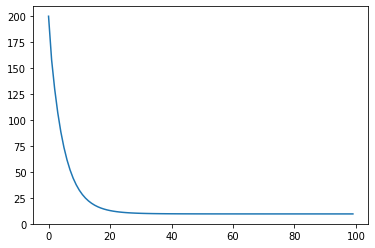

In [813]:
#Loss vs No. Of Iteration Plot
plt.plot(loss_history)
plt.show()

In [814]:
#What is the mpg of a car, whose weight is 5.5
Xi=5.5
y_ans = np.dot(W, Xi) + b
print(y_ans)

[[5.30196169]]


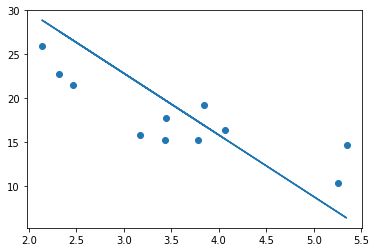

In [815]:
y_ans=np.dot(W,X_test.T)+b
plt.scatter(X_test,y_test)
plt.plot(X_test,y_ans.T)
plt.show()

In [816]:
#Compute and print accuracy measures such as RMSE and R2 for the test set
y_ans = np.dot(W, X_test.T) + b
error = m.sqrt((1/(2*(X_test.shape[0]))*np.sum(np.square(y_ans - np.array(y_test)))))
print("RMSE:", error)

RMSE: 3.074794445503173


In [817]:
d = y_test - y_ans
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(np.sum(d**2)/np.sum((y_train-np.mean(y_train))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 3.8521669612223506
MSE: 18.90872176419433
RMSE: 4.348416006340048
R-Squared: 0.7526045714940931


In [818]:
#Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function
def stochastic_model(X,Y,learning_rate,iteration):
    m_test=Y.size
    m,n=X.shape
    theta=np.random.rand(n,1)
    cost_list = []
    cost=0
    for i in range(iteration):
        cost=0
        for j in range(m):
            y_pred=np.dot(X[j],theta).reshape(1,1)
            cost=cost+np.square(y_pred-Y[j])
            d_theta=np.dot((y_pred-Y[j]).reshape(1,1),(X[j].reshape(1,1)).T)
            theta=theta -learning_rate*(d_theta.T)
        cost1=cost/m
        cost_list.append(cost1)
    return theta,cost_list
            


In [819]:
iterations_stoc = 101
learning_rate = 0.001
theta_stochastic, loss_stochastic = stochastic_model(X_train, y_train, learning_rate = learning_rate, iteration = iterations_stoc)

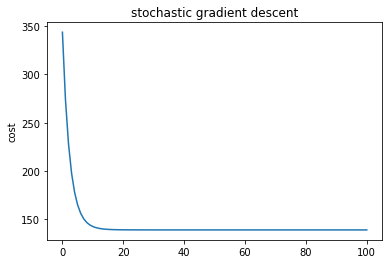

In [820]:
iteration_no = list(range(0,101))
plt.plot(iteration_no,np.squeeze(loss_stochastic))
plt.ylabel('cost')

plt.title('stochastic gradient descent')
plt.show()